In [4]:
import pandas as pd
from google.cloud import storage
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
client = storage.Client()

In [7]:
bucket_name = 'nfl_databowl_bucket'
bucket = client.bucket(bucket_name)

In [8]:
def download_from_bucket(blob_name, output_file):
    blob = bucket.blob(blob_name)
    blob.download_to_filename(output_file)
    print(f"Downloaded {blob_name} to {output_file}")

In [9]:
os.makedirs('data', exist_ok=True)

In [10]:
files_to_download = [
    'games.csv',
    'plays.csv',
    'players.csv',
    'player_play.csv',
    'tracking_week_1.csv',
]

In [11]:
for file in files_to_download:
    local_file = f'data/{file}'
    if not os.path.exists(local_file):
        download_from_bucket(file, local_file)

In [12]:
games_df = pd.read_csv('data/games.csv')
plays_df = pd.read_csv('data/plays.csv')
players_df = pd.read_csv('data/players.csv')
player_stat_df = pd.read_csv('data/player_play.csv')

In [13]:
games_df.head(16)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,9/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,9/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,9/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,9/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,9/11/2022,13:00:00,WAS,JAX,28,22


In [14]:
plays_sea_den = plays_df[plays_df["gameId"] == 2022091200]

In [15]:
plays_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,expectedPoints,offenseFormation,receiverAlignment,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,01:54,35,17,N,31,0.982017,0.017983,0.719313,EMPTY,3x2,10.0,C,6.0,36.69,16.51,False,TRADITIONAL,2.40,INSIDE_BOX,2.990,2.990,NaN,False,False,False,0,NaN,NaN,NaN,9,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,02:13,17,17,N,18,0.424356,0.575644,0.607746,EMPTY,3x2,9.0,C,4.0,20.83,20.49,False,TRADITIONAL,1.14,INSIDE_BOX,1.836,1.836,NaN,False,False,False,0,NaN,NaN,NaN,4,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,02:00,3,17,N,30,0.006291,0.993709,-0.291485,SHOTGUN,2x2,12.0,C,-4.0,26.02,17.56,False,TRADITIONAL,3.20,INSIDE_BOX,2.236,2.236,NaN,False,False,False,0,NaN,NaN,NaN,6,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,09:28,0,0,N,33,0.884223,0.115777,4.249382,SHOTGUN,2x2,11.0,C,-6.0,38.95,14.19,False,TRADITIONAL,3.02,INSIDE_BOX,2.202,2.202,NaN,False,False,False,0,NaN,NaN,NaN,4,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,02:16,10,10,N,37,0.410371,0.589629,3.928413,PISTOL,3x1,8.0,NaN,NaN,NaN,NaN,True,DESIGNED_RUN,2.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,INSIDE_LEFT,NaN,-1,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,12:49,0,10,N,79,0.207444,0.792556,0.702276,SHOTGUN,2x2,9.0,I,6.0,72.69,39.92,False,TRADITIONAL,1.67,INSIDE_BOX,1.860,1.860,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,12:32,28,26,N,35,0.724565,0.275435,1.600202,SHOTGUN,2x2,12.0,I,20.0,NaN,NaN,False,TRADITIONAL,2.24,INSIDE_BOX,3.136,3.136,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,09:59,10,14,N,97,0.165774,0.834226,5.127508,SHOTGUN,2x2,6.0,R,NaN,NaN,NaN,False,SCRAMBLE,3.28,NaN,NaN,NaN,NaN,NaN,False,NaN,0,False,INSIDE_RIGHT,NaN,10,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,00:45,7,3,N,57,0.519735,0.480265,2.926312,SINGLEBACK,2x2,3.0,I,38.0,21.89,49.48,True,TRADITIONAL,6.64,INSIDE_BOX,3.070,3.070,NaN,False,False,False,0,NaN,NaN,NaN,0,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


In [16]:
players_df[players_df["displayName"] == "Will Dissly"]

,nflId,height,weight,birthDate,collegeName,position,displayName
654,46189,6-4,267,1996-07-08,Washington,TE,Will Dissly


In [17]:
player_stat_df.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,fumbles,fumbleLost,fumbleOutOfBounds,assistedTackle,forcedFumbleAsDefense,halfSackYardsAsDefense,passDefensed,quarterbackHit,sackYardsAsDefense,safetyAsDefense,soloTackle,tackleAssist,tackleForALoss,tackleForALossYardage,hadInterception,interceptionYards,fumbleRecoveries,fumbleRecoveryYards,penaltyYards,penaltyNames,wasInitialPassRusher,causedPressure,timeToPressureAsPassRusher,getOffTimeAsPassRusher,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,True,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,False,NaN,NaN,False,False,False,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
player_stat_df.shape

(354727, 50)

In [19]:
def read_tracking_data(file_path, chunksize=100000):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        chunks.append(chunk)
    return pd.concat(chunks)

tracking_df = read_tracking_data('data/tracking_week_1.csv')

In [20]:
play_frames = tracking_df[
    (tracking_df['gameId'] == 2022091200) & 
    (tracking_df['playId'] == 315)
]

# Get the snap frame info
snap_frame = play_frames[play_frames['event'] == 'ball_snap']['frameId'].iloc[0]
positions = play_frames[play_frames['frameId'] == snap_frame]
play_direction = play_frames['playDirection'].iloc[0]

# Print basic play info
print(f"Play Direction: {play_direction}")

# Get tackle positions
tackle_positions = positions[
    positions['nflId'].isin(
        players_df[players_df['position'] == 'T']['nflId']
    )
]
print("\nTackle Positions:")
print(tackle_positions[['nflId', 'x', 'y']])

# Get TE positions
te_positions = positions[
    positions['nflId'].isin(
        players_df[players_df['position'] == 'TE']['nflId']
    )
]
print("\nTE Positions:")
print(te_positions[['nflId', 'x', 'y']])

# Get ball position
ball_position = positions[positions['nflId'].isna()].iloc[0]
print(f"\nBall Position - y: {ball_position['y']}")

Play Direction: left

Tackle Positions:
         nflId      x      y
32188  41369.0  75.35  32.97
33483  44832.0  75.44  27.24

TE Positions:
         nflId      x      y
32965  42721.0  75.74  25.64

Ball Position - y: 29.9200000762939


In [21]:
def print_dataset_info(dataframes):
    for name, df in dataframes.items():
        print(f"\n{name} Dataset Info:")
        print(f"Shape: {df.shape}")
        print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
        print("\nColumns:", df.columns.tolist())

datasets = {
    'Games': games_df,
    'Plays': plays_df,
    'Tracking': tracking_df,
    'Players': players_df,
    'Player Stats': player_stat_df
}

print_dataset_info(datasets)


Games Dataset Info:
Shape: (136, 9)
Memory usage: 0.01 MB

Columns: ['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore', 'visitorFinalScore']

Plays Dataset Info:
Shape: (16124, 50)
Memory usage: 5.94 MB

Columns: ['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber', 'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'playNullifiedByPenalty', 'absoluteYardlineNumber', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'expectedPoints', 'offenseFormation', 'receiverAlignment', 'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY', 'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType', 'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine', 'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak', 'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained', 'yardsGained', 'homeTeamWi

In [22]:
game_counts = tracking_df['gameId'].value_counts()
print("\nFrames per game:")
print(game_counts)


Frames per game:
gameId
2022091105    563247
2022091104    519340
2022091103    516695
2022091100    471776
2022091101    448960
2022091111    446246
2022091200    435965
2022091109    432561
2022091110    432262
2022090800    417772
2022091102    415311
2022091112    414736
2022091107    405467
2022091108    399671
2022091113    393714
2022091106    390977
Name: count, dtype: int64


In [23]:
game_details = games_df[games_df['gameId'].isin(tracking_df['gameId'].unique())]
print("\nGame details for tracking data:")
print(game_details)


Game details for tracking data:
        gameId  season  week   gameDate gameTimeEastern homeTeamAbbr  \
0   2022090800    2022     1   9/8/2022        20:20:00           LA   
1   2022091100    2022     1  9/11/2022        13:00:00          ATL   
2   2022091101    2022     1  9/11/2022        13:00:00          CAR   
3   2022091102    2022     1  9/11/2022        13:00:00          CHI   
4   2022091103    2022     1  9/11/2022        13:00:00          CIN   
5   2022091104    2022     1  9/11/2022        13:00:00          DET   
6   2022091105    2022     1  9/11/2022        13:00:00          HOU   
7   2022091106    2022     1  9/11/2022        13:00:00          MIA   
8   2022091107    2022     1  9/11/2022        13:00:00          NYJ   
9   2022091109    2022     1  9/11/2022        13:00:00          WAS   
10  2022091110    2022     1  9/11/2022        16:25:00          ARI   
11  2022091111    2022     1  9/11/2022        16:25:00          LAC   
12  2022091112    2022     1  9

In [24]:
football_tracking = tracking_df[tracking_df['displayName'] == 'football']
print("Sample of football tracking data:")
print(football_tracking.head())

Sample of football tracking data:
          gameId  playId  nflId displayName  frameId    frameType  \
3586  2022091200      64    NaN    football        1  BEFORE_SNAP   
3587  2022091200      64    NaN    football        2  BEFORE_SNAP   
3588  2022091200      64    NaN    football        3  BEFORE_SNAP   
3589  2022091200      64    NaN    football        4  BEFORE_SNAP   
3590  2022091200      64    NaN    football        5  BEFORE_SNAP   

                       time  jerseyNumber      club playDirection          x  \
3586  2022-09-13 00:16:03.5           NaN  football         right  39.470001   
3587  2022-09-13 00:16:03.6           NaN  football         right  39.480000   
3588  2022-09-13 00:16:03.7           NaN  football         right  39.480000   
3589  2022-09-13 00:16:03.8           NaN  football         right  39.480000   
3590  2022-09-13 00:16:03.9           NaN  football         right  39.480000   

              y    s    a  dis   o  dir                 event  
3586  

# Potential Project: Analyzing TE Pre-snap alignments to predict route run

In [25]:
te_plays = players_df[players_df['position'] == 'TE']['nflId'].unique()

In [26]:
te_plays

array([30842, 37118, 39983, 40011, 40149, 41327, 41349, 42033, 42302,
       42398, 42428, 42486, 42500, 42503, 42514, 42547, 42589, 42721,
       43324, 43370, 43383, 43399, 43845, 44009, 44792, 44831, 44835,
       44841, 44856, 44912, 44959, 44987, 45064, 45094, 45217, 45281,
       45339, 45355, 45635, 45785, 46094, 46111, 46118, 46155, 46167,
       46170, 46189, 46192, 46206, 46226, 46331, 46446, 46797, 47791,
       47803, 47833, 47835, 47852, 47879, 47904, 47920, 47924, 48011,
       48456, 48475, 48580, 48683, 48700, 48723, 48766, 52451, 52499,
       52502, 52513, 52523, 52526, 52541, 52544, 52598, 52614, 52659,
       52673, 52725, 52858, 52907, 52934, 52942, 53047, 53433, 53484,
       53510, 53512, 53526, 53553, 53556, 53574, 53576, 53591, 53715,
       53739, 53855, 53897, 53946, 53959, 54038, 54520, 54538, 54545,
       54566, 54571, 54577, 54594, 54604, 54608, 54614, 54635, 54642,
       54663, 54673, 54683, 54784, 54846, 55157])

In [27]:
te_tracking = tracking_df[
    (tracking_df['frameType'] == 'BEFORE_SNAP') & 
    (tracking_df['nflId'].isin(te_plays))
]

In [28]:
te_tracking

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2119,2022091200,64,46189.0,Will Dissly,1,BEFORE_SNAP,2022-09-13 00:16:03.5,89.0,SEA,right,33.97,25.45,0.44,0.50,0.05,209.37,81.95,huddle_break_offense
2120,2022091200,64,46189.0,Will Dissly,2,BEFORE_SNAP,2022-09-13 00:16:03.6,89.0,SEA,right,34.01,25.45,0.41,0.46,0.04,209.37,90.06,NaN
2121,2022091200,64,46189.0,Will Dissly,3,BEFORE_SNAP,2022-09-13 00:16:03.7,89.0,SEA,right,34.04,25.45,0.37,0.43,0.04,205.31,96.17,NaN
2122,2022091200,64,46189.0,Will Dissly,4,BEFORE_SNAP,2022-09-13 00:16:03.8,89.0,SEA,right,34.08,25.45,0.34,0.47,0.04,203.06,103.00,NaN
2123,2022091200,64,46189.0,Will Dissly,5,BEFORE_SNAP,2022-09-13 00:16:03.9,89.0,SEA,right,34.11,25.44,0.28,0.61,0.03,200.05,115.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101491,2022090800,3696,43399.0,Tyler Higbee,117,BEFORE_SNAP,2022-09-09 03:07:32.3,89.0,LA,left,27.48,36.94,0.00,0.00,0.00,93.00,190.91,NaN
7101492,2022090800,3696,43399.0,Tyler Higbee,118,BEFORE_SNAP,2022-09-09 03:07:32.4,89.0,LA,left,27.48,36.92,0.00,0.00,0.02,103.69,186.72,NaN
7101493,2022090800,3696,43399.0,Tyler Higbee,119,BEFORE_SNAP,2022-09-09 03:07:32.5,89.0,LA,left,27.48,36.93,0.00,0.00,0.01,119.50,189.04,NaN
7101494,2022090800,3696,43399.0,Tyler Higbee,120,BEFORE_SNAP,2022-09-09 03:07:32.6,89.0,LA,left,27.47,36.94,0.00,0.00,0.00,140.95,191.22,NaN


In [29]:
te_tracking.shape

(259276, 18)

In [30]:
unique_tes = te_tracking['displayName'].unique()
print(f"Number of unique TEs: {len(unique_tes)}")
print("\nTE Names:")
print(unique_tes)

Number of unique TEs: 94

TE Names:
['Will Dissly' 'Noah Fant' 'Colby Parkinson' 'Eric Tomlinson'
 'Eric Saubert' 'Albert Okwuegbunam' 'Dalton Schultz' 'Jake Ferguson'
 'Peyton Hendershot' 'Cameron Brate' 'Cade Otton' 'Ko Kieft'
 'Chris Myarick' 'Daniel Bellinger' 'Geoff Swaim' 'Austin Hooper'
 'Chigoziem Okonkwo' 'Tanner Hudson' 'Johnny Mundt' 'Irv Smith'
 'Ben Ellefson' 'Marcedes Lewis' 'Robert Tonyan' 'Tyler Davis'
 'Josiah Deguara' 'Gerald Everett' "Tre' McKitty" 'Darren Waller'
 'Foster Moreau' 'Richard Rodgers' 'Travis Kelce' 'Joe Fortson'
 'Noah Gray' 'Zach Ertz' 'Maxx Williams' 'Stephen Anderson' 'Evan Engram'
 'Chris Manhertz' 'Logan Thomas' 'John Bates' 'Armani Rogers' 'Dan Arnold'
 'Luke Farrell' 'C.J. Uzomah' 'Tyler Conklin' 'Lawrence Cager'
 'Mark Andrews' 'Isaiah Likely' 'Josh Oliver' 'Hunter Henry' 'Jonnu Smith'
 'Durham Smythe' 'Mike Gesicki' 'Hunter Long' 'Cethan Carter'
 'Mo Alie-Cox' 'Pharaoh Brown' 'O.J. Howard' 'Brevin Jordan'
 'Kylen Granson' 'Jelani Woods' 'T.J. 

In [31]:
print("Unique events:")
print(te_tracking['event'].unique())

Unique events:
['huddle_break_offense' nan 'line_set' 'man_in_motion' 'shift'
 'timeout_away' 'huddle_start_offense']


In [32]:
print("\nTE alignment stats:")
print("X position stats:")
print(te_tracking['x'].describe())
print("\nY position stats:")
print(te_tracking['y'].describe())


TE alignment stats:
X position stats:
count    259276.000000
mean         60.887301
std          24.970959
min           4.870000
25%          39.760000
50%          61.450000
75%          81.640000
max         116.160000
Name: x, dtype: float64

Y position stats:
count    259276.000000
mean         26.884160
std           6.903831
min           6.960000
25%          21.080000
50%          26.810000
75%          32.800000
max          47.130000
Name: y, dtype: float64


In [33]:
te_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259276 entries, 2119 to 7101495
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameId         259276 non-null  int64  
 1   playId         259276 non-null  int64  
 2   nflId          259276 non-null  float64
 3   displayName    259276 non-null  object 
 4   frameId        259276 non-null  int64  
 5   frameType      259276 non-null  object 
 6   time           259276 non-null  object 
 7   jerseyNumber   259276 non-null  float64
 8   club           259276 non-null  object 
 9   playDirection  259276 non-null  object 
 10  x              259276 non-null  float64
 11  y              259276 non-null  float64
 12  s              259276 non-null  float64
 13  a              259276 non-null  float64
 14  dis            259276 non-null  float64
 15  o              259276 non-null  float64
 16  dir            259276 non-null  float64
 17  event          5642 non-null  

In [34]:
te_tracking.isna().sum()

gameId                0
playId                0
nflId                 0
displayName           0
frameId               0
frameType             0
time                  0
jerseyNumber          0
club                  0
playDirection         0
x                     0
y                     0
s                     0
a                     0
dis                   0
o                     0
dir                   0
event            253634
dtype: int64

In [35]:
pre_snap_positions = te_tracking.sort_values('frameId').groupby(['gameId', 'playId']).last().reset_index()

In [36]:
pre_snap_positions['y'].sort_values()

33       7.06
602      7.24
1152     7.31
474      7.53
65       7.81
        ...  
577     46.50
707     46.51
556     46.93
974     46.97
1752    47.12
Name: y, Length: 1914, dtype: float64

In [37]:
pre_snap_positions

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,47879.0,Dawson Knox,145,BEFORE_SNAP,2022-09-09 00:24:02.6,88.0,BUF,left,86.25,34.36,0.01,0.01,0.06,204.48,51.77,line_set
1,2022090800,80,47879.0,Dawson Knox,87,BEFORE_SNAP,2022-09-09 00:24:33.1,88.0,BUF,left,80.20,37.16,0.00,0.00,0.00,266.44,302.64,man_in_motion
2,2022090800,101,47879.0,Dawson Knox,105,BEFORE_SNAP,2022-09-09 00:25:08.6,88.0,BUF,left,73.83,34.54,0.03,0.05,0.03,269.82,179.68,man_in_motion
3,2022090800,122,47879.0,Dawson Knox,112,BEFORE_SNAP,2022-09-09 00:25:47.6,88.0,BUF,left,68.97,27.00,0.03,0.03,0.01,264.83,179.70,line_set
4,2022090800,167,47879.0,Dawson Knox,101,BEFORE_SNAP,2022-09-09 00:27:08.1,88.0,BUF,left,58.50,41.24,0.00,0.00,0.00,262.44,283.87,line_set
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2022091200,3747,52526.0,Albert Okwuegbunam,41,BEFORE_SNAP,2022-09-13 03:02:59.5,85.0,DEN,left,61.83,23.00,0.08,0.05,0.01,274.16,288.22,line_set
1910,2022091200,3795,52526.0,Albert Okwuegbunam,152,BEFORE_SNAP,2022-09-13 03:04:57.2,85.0,DEN,left,65.21,37.98,0.18,0.45,0.02,243.76,239.65,line_set
1911,2022091200,3826,52526.0,Albert Okwuegbunam,89,BEFORE_SNAP,2022-09-13 03:05:49.6,85.0,DEN,left,65.46,35.99,0.10,0.15,0.01,264.48,214.15,line_set
1912,2022091200,3980,52541.0,Colby Parkinson,49,BEFORE_SNAP,2022-09-13 03:11:55.1,84.0,SEA,right,60.84,27.58,0.03,0.23,0.01,97.22,190.96,line_set


In [38]:
print("\nNumber of pre-snap positions analyzed:", len(pre_snap_positions))
print("\nMost common alignment areas (rounded to nearest yard):")
position_counts = pre_snap_positions.groupby([
    pre_snap_positions['x'].round(),
    pre_snap_positions['y'].round()
]).size().sort_values(ascending=False).head(5)
print(position_counts)


Number of pre-snap positions analyzed: 1914

Most common alignment areas (rounded to nearest yard):
x     y   
86.0  25.0    9
68.0  19.0    7
74.0  35.0    7
87.0  35.0    7
79.0  35.0    7
dtype: int64


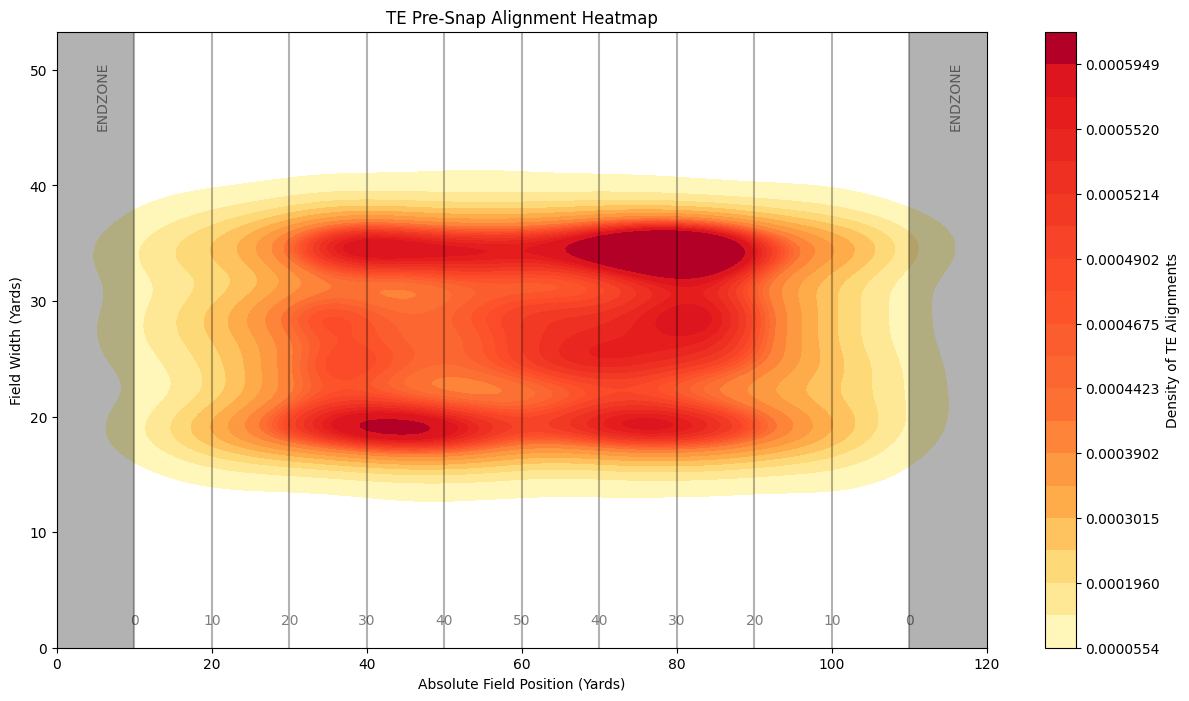

In [39]:
# Create figure
plt.figure(figsize=(15, 8))

# Create the heatmap first - save the KDE plot object
kde_plot = sns.kdeplot(
    data=pre_snap_positions,
    x='x',
    y='y',
    cmap='YlOrRd',
    fill=True,
    levels=20
)

# Add yard lines every 10 yards
for i in range(10, 111, 10):  # Start at 10 (end of first endzone) to 110 (start of second endzone)
    plt.axvline(x=i, color='black', alpha=0.3, linestyle='-')
    # Add yard line numbers (showing 0-50-0)
    yard_number = i - 10 if i <= 60 else 110 - i
    plt.text(i, 2, str(yard_number), color='black', alpha=0.5, ha='center')

# Add endzones with transparent gray
plt.axvspan(0, 10, facecolor='black', alpha=0.3)  # First endzone
plt.axvspan(110, 120, facecolor='black', alpha=0.3)  # Second endzone

# Add endzone labels
plt.text(5, 45, 'ENDZONE', color='black', alpha=0.5, rotation=90)
plt.text(115, 45, 'ENDZONE', color='black', alpha=0.5, rotation=90)

# Labels and title
plt.title('TE Pre-Snap Alignment Heatmap')
plt.xlabel('Absolute Field Position (Yards)')
plt.ylabel('Field Width (Yards)')

# Set the axis limits
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# Add colorbar using the KDE plot
plt.colorbar(kde_plot.collections[0], label='Density of TE Alignments')

plt.show()

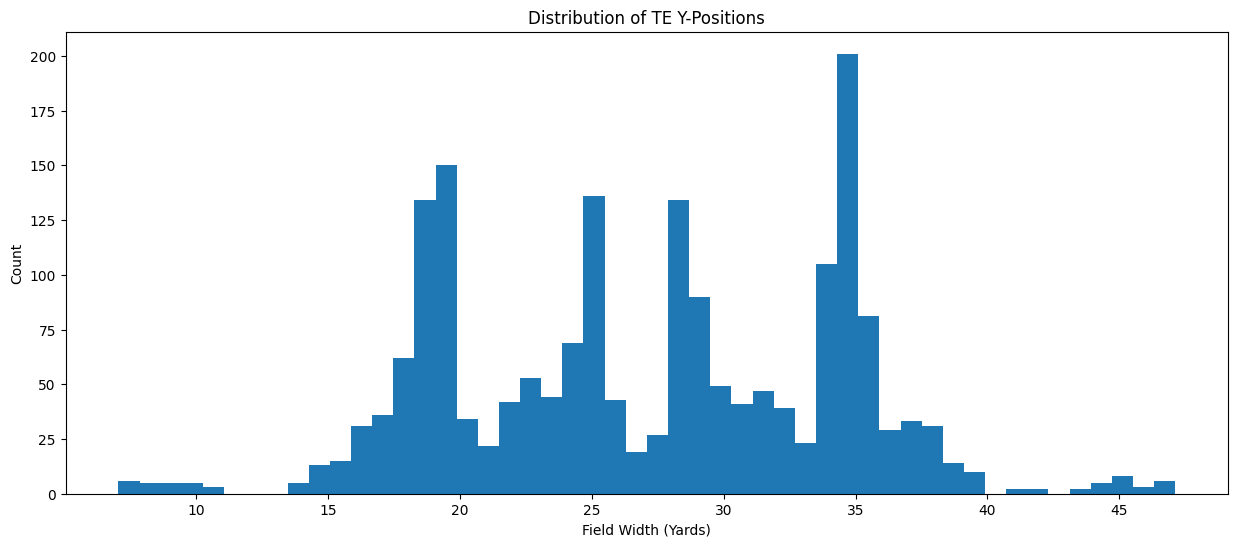


Basic statistics for y positions:
count    1914.000000
mean       27.061656
std         7.163398
min         7.060000
25%        20.025000
50%        27.880000
75%        34.107500
max        47.120000
Name: y, dtype: float64

Percentage of positions below 10 yards: 1.10%


In [40]:
# Let's look at the distribution of y values more directly
plt.figure(figsize=(15, 6))

# Create a histogram of y values
plt.hist(pre_snap_positions['y'], bins=50)
plt.title('Distribution of TE Y-Positions')
plt.xlabel('Field Width (Yards)')
plt.ylabel('Count')
plt.show()

# Also let's get some basic stats about y positions
print("\nBasic statistics for y positions:")
print(pre_snap_positions['y'].describe())

# Let's see what percentage of positions are below y=10
low_positions = pre_snap_positions[pre_snap_positions['y'] < 10]
print(f"\nPercentage of positions below 10 yards: {len(low_positions) / len(pre_snap_positions) * 100:.2f}%")

In [41]:
play_frame = te_tracking.groupby(['gameId', 'playId']).agg(list()).reset_index()

# For each play, get positions of all players
offense_tracking = tracking_df[tracking_df['frameType'] == 'BEFORE_SNAP'].copy()

# Join with players_df to get positions
offense_positions = pd.merge(offense_tracking, players_df[['nflId', 'position']], on='nflId', how='left')

# Now we can see where TEs are relative to tackles
example_play = offense_positions[offense_positions['gameId'] == 2022091200]
tackle_positions = example_play[example_play['position'] == 'T']
te_positions = example_play[example_play['position'] == 'TE']

In [42]:
print("Available gameIds:")
print(offense_positions['gameId'].unique())

# Take the first gameId as an example
example_game = offense_positions['gameId'].unique()[0]

Available gameIds:
[2022091200 2022091113 2022091108 2022091112 2022091111 2022091110
 2022091109 2022091107 2022091106 2022091105 2022091104 2022091103
 2022091102 2022091101 2022091100 2022090800]


In [43]:
print("\nSelected game:", example_game)
print("\nNumber of tackles found:", len(tackle_positions))
print("Number of TEs found:", len(te_positions))


Selected game: 2022091200

Number of tackles found: 24612
Number of TEs found: 17170


In [44]:
te_positions.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position
1469,2022091200,64,46189.0,Will Dissly,1,BEFORE_SNAP,2022-09-13 00:16:03.5,89.0,SEA,right,33.97,25.45,0.44,0.50,0.05,209.37,81.95,huddle_break_offense,TE
1470,2022091200,64,46189.0,Will Dissly,2,BEFORE_SNAP,2022-09-13 00:16:03.6,89.0,SEA,right,34.01,25.45,0.41,0.46,0.04,209.37,90.06,NaN,TE
1471,2022091200,64,46189.0,Will Dissly,3,BEFORE_SNAP,2022-09-13 00:16:03.7,89.0,SEA,right,34.04,25.45,0.37,0.43,0.04,205.31,96.17,NaN,TE
1472,2022091200,64,46189.0,Will Dissly,4,BEFORE_SNAP,2022-09-13 00:16:03.8,89.0,SEA,right,34.08,25.45,0.34,0.47,0.04,203.06,103.00,NaN,TE
1473,2022091200,64,46189.0,Will Dissly,5,BEFORE_SNAP,2022-09-13 00:16:03.9,89.0,SEA,right,34.11,25.44,0.28,0.61,0.03,200.05,115.06,NaN,TE


In [45]:
tackle_positions.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position
2260,2022091200,64,54474.0,Charles Cross,1,BEFORE_SNAP,2022-09-13 00:16:03.5,67.0,SEA,right,35.05,25.65,1.27,0.55,0.14,131.06,54.86,huddle_break_offense,T
2261,2022091200,64,54474.0,Charles Cross,2,BEFORE_SNAP,2022-09-13 00:16:03.6,67.0,SEA,right,35.18,25.73,1.42,0.53,0.15,120.60,58.09,NaN,T
2262,2022091200,64,54474.0,Charles Cross,3,BEFORE_SNAP,2022-09-13 00:16:03.7,67.0,SEA,right,35.32,25.81,1.54,0.46,0.16,109.99,59.87,NaN,T
2263,2022091200,64,54474.0,Charles Cross,4,BEFORE_SNAP,2022-09-13 00:16:03.8,67.0,SEA,right,35.47,25.89,1.62,0.36,0.17,101.69,61.85,NaN,T
2264,2022091200,64,54474.0,Charles Cross,5,BEFORE_SNAP,2022-09-13 00:16:03.9,67.0,SEA,right,35.65,25.97,1.78,0.45,0.19,92.96,64.56,NaN,T


In [90]:
print("Available playIds for this game:")
print(example_play['playId'].unique())

# Select a specific play
example_play_id = example_play['playId'].unique()[2]
last_frame = example_play[
    example_play['playId'] == example_play_id
]['frameId'].max()

# Then use that frame to get the pre-snap data
pre_snap = example_play[
    (example_play['playId'] == example_play_id) & 
    (example_play['frameId'] == last_frame)
].set_index(['nflId', 'position'])

Available playIds for this game:
[  64   85  109  156  180  201  264  286  315  346  375  401  446  467
  565  601  622  643  664  688  716  741  762  786  810  882  910  931
  983 1004 1028 1057 1092 1164 1217 1241 1299 1320 1344 1409 1433 1465
 1487 1521 1550 1579 1642 1680 1704 1725 1764 1793 1815 1851 1967 1988
 2009 2038 2067 2093 2188 2244 2268 2292 2370 2391 2479 2500 2522 2546
 2591 2613 2667 2688 2712 2750 2779 2801 2830 2883 2923 2944 2965 3001
 3048 3077 3101 3125 3149 3173 3194 3216 3245 3267 3296 3325 3382 3404
 3467 3491 3515 3553 3574 3596 3628 3685 3723 3747 3795 3826 3980 4012]


In [91]:
pre_snap.head()

,,gameId,playId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
nflId,position,,,,,,,,,,,,,,,,,
35459.0,SS,2022091200,109,Kareem Jackson,147,BEFORE_SNAP,2022-09-13 00:17:30.2,22.0,DEN,right,54.89,35.62,1.27,1.14,0.12,255.17,279.66,NaN
39987.0,QB,2022091200,109,Geno Smith,147,BEFORE_SNAP,2022-09-13 00:17:30.2,7.0,SEA,right,41.77,24.19,0.20,0.49,0.02,105.80,283.86,NaN
40026.0,WR,2022091200,109,Marquise Goodwin,147,BEFORE_SNAP,2022-09-13 00:17:30.2,11.0,SEA,right,46.05,9.00,0.23,0.57,0.02,73.63,72.94,NaN
41310.0,G,2022091200,109,Gabe Jackson,147,BEFORE_SNAP,2022-09-13 00:17:30.2,66.0,SEA,right,45.56,22.69,0.13,0.19,0.01,125.55,2.25,NaN
42030.0,CB,2022091200,109,K'Waun Williams,147,BEFORE_SNAP,2022-09-13 00:17:30.2,21.0,DEN,right,52.88,14.74,0.16,0.16,0.02,280.37,141.89,NaN


In [92]:
print("\nTackle positions:")
print(pre_snap[pre_snap.index.get_level_values('position') == 'T'][['x', 'y']])

print("\nTE positions:")
print(pre_snap[pre_snap.index.get_level_values('position') == 'TE'][['x', 'y']])


Tackle positions:
                      x      y
nflId   position              
54474.0 T         45.25  27.17
54537.0 T         45.40  21.03

TE positions:
                      x      y
nflId   position              
47803.0 TE        45.41  44.68


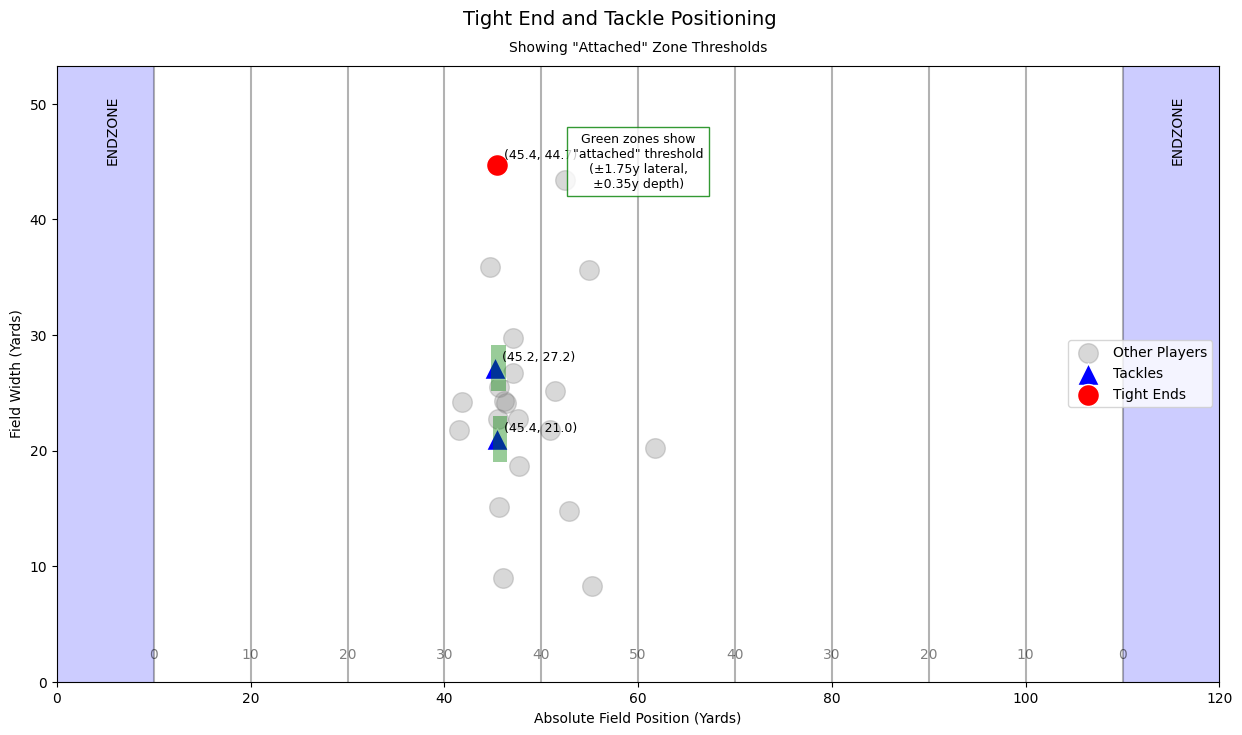

In [93]:
plt.figure(figsize=(15, 8))

# Add yard lines every 10 yards
for i in range(10, 111, 10):
    plt.axvline(x=i, color='black', alpha=0.3, linestyle='-')
    yard_number = i - 10 if i <= 60 else 110 - i
    plt.text(i, 2, str(yard_number), color='black', alpha=0.5, ha='center')

# Add endzones with transparent gray
plt.axvspan(0, 10, facecolor='blue', alpha=.2)
plt.axvspan(110, 120, facecolor='blue', alpha=.2)

# Add endzone labels
plt.text(5, 45, 'ENDZONE', color='black', alpha=1, rotation=90)
plt.text(115, 45, 'ENDZONE', color='black', alpha=1, rotation=90)

# Only get T and TE positions
relevant_positions = pre_snap[pre_snap.index.get_level_values('position').isin(['T', 'TE'])]

other_positions = pre_snap[~pre_snap.index.get_level_values('position').isin(['T', 'TE'])]
plt.scatter(other_positions['x'], 
           other_positions['y'],
           marker='o', s=200, label='Other Players', color='gray', alpha=0.3)

# Plot tackles (as triangles)
plt.scatter(pre_snap[pre_snap.index.get_level_values('position') == 'T']['x'], 
           pre_snap[pre_snap.index.get_level_values('position') == 'T']['y'],
           marker='^', s=250, label='Tackles', color='blue', edgecolor='white')

plt.scatter(pre_snap[pre_snap.index.get_level_values('position') == 'TE']['x'], 
           pre_snap[pre_snap.index.get_level_values('position') == 'TE']['y'],
           marker='o', s=250, label='Tight Ends', color='red', edgecolor='white')


for idx in pre_snap[pre_snap.index.get_level_values('position') == 'T'].index:
    tackle_x = pre_snap.loc[idx, 'x']
    tackle_y = pre_snap.loc[idx, 'y']
    
    # Create rectangle for "attached zone"
    rect = patches.Rectangle(
        (tackle_x - 0.4, tackle_y - 2),  # Slightly larger area
        1.5,  # width
        4,    # height
        linewidth=3,  # Thicker border
        facecolor='green',
        alpha=0.4    # More opaque
    )
    plt.gca().add_patch(rect)
    
# Only annotate T and TE positions
for idx in relevant_positions.index:
    x = relevant_positions.loc[idx, 'x']
    y = relevant_positions.loc[idx, 'y']
    
    label = f"({x:.1f}, {y:.1f})"
        
    plt.annotate(label,
                (x, y),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9)

plt.text(60, 45, 'Green zones show\n"attached" threshold\n(±1.75y lateral,\n±0.35y depth)',
         bbox=dict(facecolor='white', edgecolor='green', alpha=0.8),
         ha='center', va='center', fontsize=9)

# Titles and labels
plt.suptitle('Tight End and Tackle Positioning', y=0.95, fontsize=14)
plt.title('Showing "Attached" Zone Thresholds', fontsize=10, pad=10)
plt.xlabel('Absolute Field Position (Yards)', fontsize=10)
plt.ylabel('Field Width (Yards)', fontsize=10)

# Set plot limits
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# Move legend to a better position
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.savefig('te_position_viz.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

In [45]:
te_positions_2 = pre_snap[pre_snap.index.get_level_values('position') == 'TE']
tackle_positions_2 = pre_snap[pre_snap.index.get_level_values('position') == 'T']

In [46]:
def calculate_xy_distances_from_tackles(te_row, tackle_positions, play_direction):
    te_x = te_row['x']
    te_y = te_row['y']
    
    # Sort tackles by y-value
    sorted_tackles = tackle_positions.sort_values('y')
    high_y_tackle = sorted_tackles.iloc[-1]  # Higher y-value
    low_y_tackle = sorted_tackles.iloc[0]   # Lower y-value
    
    # Determine which is left/right tackle based on play direction
    if play_direction == 'right':
        left_tackle = high_y_tackle  # Higher y-value is left tackle
        right_tackle = low_y_tackle   # Lower y-value is right tackle
    else:  # play_direction == 'left'
        left_tackle = low_y_tackle    # Lower y-value is left tackle
        right_tackle = high_y_tackle  # Higher y-value is right tackle
    
    # Calculate distances to both tackles
    lt_x_dist = te_x - left_tackle['x']
    lt_y_dist = te_y - left_tackle['y']
    rt_x_dist = te_x - right_tackle['x']
    rt_y_dist = te_y - right_tackle['y']
    
    # Determine which tackle is nearest based on absolute y-distance
    if abs(lt_y_dist) < abs(rt_y_dist):
        x_dist = lt_x_dist
        y_dist = lt_y_dist if play_direction == 'right' else -lt_y_dist
    else:
        x_dist = rt_x_dist
        y_dist = -rt_y_dist if play_direction == 'right' else rt_y_dist
        
    return x_dist, y_dist

In [47]:
play_direction = te_positions_2['playDirection'].iloc[0]  # Get play direction
print(f"Play Direction: {play_direction}")

for te_id, te_row in te_positions_2.iterrows():
    x_dist, y_dist = calculate_xy_distances_from_tackles(te_row, tackle_positions_2, play_direction)
    print(f"TE {te_id}:")
    print(f"  X-distance from nearest tackle: {x_dist:.2f} yards")
    print(f"  Y-distance from nearest tackle: {y_dist:.2f} yards")

Play Direction: right
TE (46189.0, 'TE'):
  X-distance from nearest tackle: -0.37 yards
  Y-distance from nearest tackle: 2.28 yards
TE (47803.0, 'TE'):
  X-distance from nearest tackle: -1.40 yards
  Y-distance from nearest tackle: -0.62 yards


In [48]:
def get_te_motion_features(game_id, play_id, tracking_df):
    """
    Get TE motion features for a single play
    """
    # Get all frames for this play
    play_frames = tracking_df[
        (tracking_df['gameId'] == game_id) & 
        (tracking_df['playId'] == play_id)
    ].sort_values('frameId')
    
    # Get TE and tackle data
    te_frames = play_frames[play_frames['position'] == 'TE']
    tackle_frames = play_frames[play_frames['position'] == 'T']
    
    features_by_te = {}
    
    # For each TE in the play
    for te_id in te_frames['nflId'].unique():
        te_motion = te_frames[te_frames['nflId'] == te_id]
        
        # Get initial and final positions
        initial_frame = te_motion.iloc[0]
        final_frame = te_motion.iloc[-1]
        
        # Get corresponding tackle positions
        initial_tackles = tackle_frames[tackle_frames['frameId'] == initial_frame['frameId']]
        final_tackles = tackle_frames[tackle_frames['frameId'] == final_frame['frameId']]
        
        # Calculate distances
        initial_x, initial_y = calculate_xy_distances_from_tackles(initial_frame, initial_tackles, initial_frame['playDirection'])
        final_x, final_y = calculate_xy_distances_from_tackles(final_frame, final_tackles, final_frame['playDirection'])
        
        # Calculate total motion distance
        total_motion = ((final_frame['x'] - initial_frame['x'])**2 + 
                       (final_frame['y'] - initial_frame['y'])**2)**0.5
        
        features_by_te[te_id] = {
            'initial_x_dist': initial_x,
            'initial_y_dist': initial_y,
            'final_x_dist': final_x,
            'final_y_dist': final_y,
            'total_motion_distance': total_motion,
            'motion_direction': 'inside_to_out' if abs(final_y) > abs(initial_y) else 'out_to_in',
            'game_id': game_id,
            'play_id': play_id
        }
    
    return features_by_te

In [49]:
features = get_te_motion_features(example_game, example_play_id, offense_positions)
print("Motion features for example play:")
for te_id, te_features in features.items():
    print(f"\nTE {te_id}:")
    for feature, value in te_features.items():
        print(f"  {feature}: {value}")

Motion features for example play:

TE 46189.0:
  initial_x_dist: -1.0799999999999983
  initial_y_dist: -0.1999999999999993
  final_x_dist: -0.37000000000000455
  final_y_dist: 2.280000000000001
  total_motion_distance: 8.137720811136248
  motion_direction: inside_to_out
  game_id: 2022091200
  play_id: 64

TE 47803.0:
  initial_x_dist: -1.6400000000000006
  initial_y_dist: -0.029999999999997584
  final_x_dist: -1.3999999999999986
  final_y_dist: -0.6199999999999974
  total_motion_distance: 3.631859028101175
  motion_direction: inside_to_out
  game_id: 2022091200
  play_id: 64


In [50]:
fant_sequence = tracking_df[
    (tracking_df['gameId'] == example_game) & 
    (tracking_df['playId'] == example_play_id) & 
    (tracking_df['displayName'] == 'Noah Fant')
].sort_values('frameId')

# Display each frame with key information
print("Frame by frame sequence for Noah Fant:")
print("frameId | event | x | y | time")
print("-" * 70)
for _, frame in fant_sequence.iterrows():
    print(f"{frame['frameId']:7d} | {str(frame['event']):20s} | {frame['x']:5.2f} | {frame['y']:5.2f} | {frame['time']}")

Frame by frame sequence for Noah Fant:
frameId | event | x | y | time
----------------------------------------------------------------------
      1 | huddle_break_offense | 33.41 | 25.62 | 2022-09-13 00:16:03.5
      2 | nan                  | 33.48 | 25.74 | 2022-09-13 00:16:03.6
      3 | nan                  | 33.55 | 25.84 | 2022-09-13 00:16:03.7
      4 | nan                  | 33.64 | 25.96 | 2022-09-13 00:16:03.8
      5 | nan                  | 33.74 | 26.07 | 2022-09-13 00:16:03.9
      6 | nan                  | 33.85 | 26.19 | 2022-09-13 00:16:04
      7 | nan                  | 33.97 | 26.31 | 2022-09-13 00:16:04.1
      8 | nan                  | 34.10 | 26.44 | 2022-09-13 00:16:04.2
      9 | nan                  | 34.24 | 26.57 | 2022-09-13 00:16:04.3
     10 | nan                  | 34.38 | 26.70 | 2022-09-13 00:16:04.4
     11 | nan                  | 34.54 | 26.84 | 2022-09-13 00:16:04.5
     12 | nan                  | 34.70 | 26.98 | 2022-09-13 00:16:04.6
     13 |

In [51]:
play_stats = player_stat_df[
    (player_stat_df['gameId'] == example_game) & 
    (player_stat_df['playId'] == example_play_id)
]

In [52]:
motion_data = play_stats[[
    'nflId', 
    'inMotionAtBallSnap', 
    'shiftSinceLineset', 
    'motionSinceLineset'
]]

print("Motion data for all players in this play:")
print(motion_data)

# Focus on our TE (Noah Fant)
te_motion = motion_data[motion_data['nflId'] == 47803.0]
print("\nNoah Fant's motion data:")
print(te_motion)


Motion data for all players in this play:
       nflId inMotionAtBallSnap shiftSinceLineset motionSinceLineset
40480  35459                NaN               NaN                NaN
40481  42393                NaN               NaN                NaN
40482  42403                NaN               NaN                NaN
40483  42826                NaN               NaN                NaN
40484  42929                NaN               NaN                NaN
40485  43387                NaN               NaN                NaN
40486  45011                NaN               NaN                NaN
40487  46074                NaN               NaN                NaN
40488  47854                NaN               NaN                NaN
40489  52706                NaN               NaN                NaN
40490  53438                NaN               NaN                NaN
40491  39987              False             False              False
40492  41310              False             False            

In [53]:
te_motion = motion_data[motion_data['nflId'] == 46189.0]
print("\nWill Dissly's motion data:")
print(te_motion)


Will Dissly's motion data:
       nflId inMotionAtBallSnap shiftSinceLineset motionSinceLineset
40496  46189              False             False               True


In [54]:
te_tracking_detailed = tracking_df[
    (tracking_df['gameId'] == example_game) & 
    (tracking_df['playId'] == example_play_id) & 
    (tracking_df['displayName'].isin(['Noah Fant', 'Will Dissly']))  # Both TEs
].sort_values(['displayName', 'frameId'])

# Display all columns for both TEs
pd.set_option('display.max_columns', None)
print("Full tracking data for both TEs:")
te_tracking_detailed

Full tracking data for both TEs:


,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2282,2022091200,64,47803.0,Noah Fant,1,BEFORE_SNAP,2022-09-13 00:16:03.5,87.0,SEA,right,33.41,25.62,1.22,1.01,0.12,84.09,26.30,huddle_break_offense
2283,2022091200,64,47803.0,Noah Fant,2,BEFORE_SNAP,2022-09-13 00:16:03.6,87.0,SEA,right,33.48,25.74,1.31,1.06,0.13,83.50,31.92,NaN
2284,2022091200,64,47803.0,Noah Fant,3,BEFORE_SNAP,2022-09-13 00:16:03.7,87.0,SEA,right,33.55,25.84,1.38,1.09,0.13,80.84,37.41,NaN
2285,2022091200,64,47803.0,Noah Fant,4,BEFORE_SNAP,2022-09-13 00:16:03.8,87.0,SEA,right,33.64,25.96,1.48,1.03,0.14,76.47,39.36,NaN
2286,2022091200,64,47803.0,Noah Fant,5,BEFORE_SNAP,2022-09-13 00:16:03.9,87.0,SEA,right,33.74,26.07,1.57,0.87,0.15,73.15,41.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2022091200,64,46189.0,Will Dissly,159,AFTER_SNAP,2022-09-13 00:16:19.3,89.0,SEA,right,37.92,2.49,0.56,0.93,0.05,150.64,342.73,tackle
2278,2022091200,64,46189.0,Will Dissly,160,AFTER_SNAP,2022-09-13 00:16:19.4,89.0,SEA,right,37.91,2.54,0.56,0.76,0.05,164.58,352.50,NaN
2279,2022091200,64,46189.0,Will Dissly,161,AFTER_SNAP,2022-09-13 00:16:19.5,89.0,SEA,right,37.91,2.58,0.45,0.81,0.04,171.48,357.42,NaN
2280,2022091200,64,46189.0,Will Dissly,162,AFTER_SNAP,2022-09-13 00:16:19.6,89.0,SEA,right,37.91,2.63,0.41,0.99,0.04,199.54,6.75,NaN


In [55]:
te_tracking_detailed[te_tracking_detailed["frameId"] == 69]

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2350,2022091200,64,47803.0,Noah Fant,69,BEFORE_SNAP,2022-09-13 00:16:10.3,87.0,SEA,right,37.54,28.53,0.20,0.48,0.02,83.55,330.77,NaN
2187,2022091200,64,46189.0,Will Dissly,69,BEFORE_SNAP,2022-09-13 00:16:10.3,89.0,SEA,right,35.17,25.66,2.42,3.35,0.22,130.74,153.62,NaN


In [56]:
def identify_tes_in_motion(game_id, play_id, player_play_df, players_df):
    """
    Identify TEs and their motion status for a specific play
    """
    # Get play data
    play_data = player_play_df[
        (player_play_df['gameId'] == game_id) & 
        (player_play_df['playId'] == play_id)
    ]
    
    # Join with players_df to get positions and names
    play_data = pd.merge(
        play_data,
        players_df[['nflId', 'displayName', 'position']],
        on='nflId',
        how='left'
    )
    
    # Filter for TEs and get motion info
    te_motion_data = play_data[play_data['position'] == 'TE'][[
        'nflId',
        'displayName',
        'position',
        'inMotionAtBallSnap',
        'motionSinceLineset',
        'shiftSinceLineset'
    ]]
    
    return te_motion_data

# Test for our example play
motion_info = identify_tes_in_motion(example_game, example_play_id, player_stat_df, players_df)
print("TE Motion Information:")
print(motion_info)

TE Motion Information:
    nflId  displayName position inMotionAtBallSnap motionSinceLineset  \
16  46189  Will Dissly       TE              False               True   
17  47803    Noah Fant       TE               True               True   

   shiftSinceLineset  
16             False  
17             False  


In [57]:
motion_info

,nflId,displayName,position,inMotionAtBallSnap,motionSinceLineset,shiftSinceLineset
16,46189,Will Dissly,TE,False,True,False
17,47803,Noah Fant,TE,True,True,False


**Note**

motionSinceLineset = When a player moves after the initial line set and comes to a stop before the snap.

motionAtBallSnap = When a player is still in motion when the ball is snapped.

shiftSinceLineset = When a player is involved in a shift (i.e. two players moving simultaneously after the initial line set who come to a stop before the snap).

In [58]:
def get_te_motion_tracking(game_id, play_id, te_id, tracking_df):
    """
    Get tracking data between line_set and ball_snap for a specific TE
    """
    te_data = tracking_df[
        (tracking_df['gameId'] == game_id) & 
        (tracking_df['playId'] == play_id) &
        (tracking_df['nflId'] == te_id)
    ].sort_values('frameId')
    
    # Find line_set and ball_snap frames
    line_set_frame = te_data[te_data['event'] == 'line_set']['frameId'].iloc[0]
    ball_snap_frame = te_data[te_data['event'] == 'ball_snap']['frameId'].iloc[0]
    
    # Get motion sequence
    motion_sequence = te_data[
        (te_data['frameId'] >= line_set_frame) & 
        (te_data['frameId'] <= ball_snap_frame)
    ]
    
    return motion_sequence

# Test for Noah Fant
fant_tracking = get_te_motion_tracking(example_game, example_play_id, 47803.0, tracking_df)

In [59]:
fant_tracking

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
2324,2022091200,64,47803.0,Noah Fant,43,BEFORE_SNAP,2022-09-13 00:16:07.7,87.0,SEA,right,37.59,28.49,0.03,0.15,0.00,73.71,128.33,line_set
2325,2022091200,64,47803.0,Noah Fant,44,BEFORE_SNAP,2022-09-13 00:16:07.8,87.0,SEA,right,37.59,28.49,0.05,0.21,0.00,73.71,165.51,NaN
2326,2022091200,64,47803.0,Noah Fant,45,BEFORE_SNAP,2022-09-13 00:16:07.9,87.0,SEA,right,37.59,28.48,0.08,0.31,0.01,75.42,182.08,NaN
2327,2022091200,64,47803.0,Noah Fant,46,BEFORE_SNAP,2022-09-13 00:16:08,87.0,SEA,right,37.60,28.48,0.06,0.22,0.00,78.11,181.51,NaN
2328,2022091200,64,47803.0,Noah Fant,47,BEFORE_SNAP,2022-09-13 00:16:08.1,87.0,SEA,right,37.59,28.48,0.07,0.21,0.00,74.17,210.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2022091200,64,47803.0,Noah Fant,110,BEFORE_SNAP,2022-09-13 00:16:14.4,87.0,SEA,right,37.26,27.31,3.33,4.17,0.31,161.68,194.85,NaN
2392,2022091200,64,47803.0,Noah Fant,111,BEFORE_SNAP,2022-09-13 00:16:14.5,87.0,SEA,right,37.18,26.96,3.84,4.21,0.36,166.07,192.85,NaN
2393,2022091200,64,47803.0,Noah Fant,112,BEFORE_SNAP,2022-09-13 00:16:14.6,87.0,SEA,right,37.09,26.55,4.35,4.05,0.41,169.24,191.29,NaN
2394,2022091200,64,47803.0,Noah Fant,113,BEFORE_SNAP,2022-09-13 00:16:14.7,87.0,SEA,right,37.01,26.10,4.81,3.67,0.46,171.10,189.58,NaN


In [60]:
# Get tracking for Will Dissly
dissly_tracking = get_te_motion_tracking(example_game, example_play_id, 46189, tracking_df)
print("Will Dissly's tracking data (motion after line set, but set before snap):")
print(dissly_tracking[['frameId', 'event', 'x', 'y']])

print("\n--------------------\n")

# Get tracking for Noah Fant
fant_tracking = get_te_motion_tracking(example_game, example_play_id, 47803, tracking_df)
print("Noah Fant's tracking data (in motion at snap):")
print(fant_tracking[['frameId', 'event', 'x', 'y']])

Will Dissly's tracking data (motion after line set, but set before snap):
      frameId      event      x      y
2161       43   line_set  34.72  26.46
2162       44        NaN  34.72  26.46
2163       45        NaN  34.73  26.46
2164       46        NaN  34.74  26.46
2165       47        NaN  34.75  26.45
...       ...        ...    ...    ...
2228      110        NaN  38.08  18.51
2229      111        NaN  38.09  18.50
2230      112        NaN  38.10  18.48
2231      113        NaN  38.12  18.45
2232      114  ball_snap  38.16  18.39

[72 rows x 4 columns]

--------------------

Noah Fant's tracking data (in motion at snap):
      frameId      event      x      y
2324       43   line_set  37.59  28.49
2325       44        NaN  37.59  28.49
2326       45        NaN  37.59  28.48
2327       46        NaN  37.60  28.48
2328       47        NaN  37.59  28.48
...       ...        ...    ...    ...
2391      110        NaN  37.26  27.31
2392      111        NaN  37.18  26.96
2393      112 

In [61]:
def analyze_te_motion(game_id, play_id, player_play_df, players_df, tracking_df):
    """
    Analyze TE motion patterns for a play by combining motion flags and tracking data
    """
    # First identify which TEs had motion and what type
    te_motion_info = identify_tes_in_motion(game_id, play_id, player_stat_df, players_df)
    
    motion_analysis = []
    
    # For each TE in the play
    for _, te in te_motion_info.iterrows():
        # Get their tracking data
        te_tracking = get_te_motion_tracking(game_id, play_id, te['nflId'], tracking_df)
        
        # Get initial and final positions
        initial_pos = te_tracking.iloc[0][['x', 'y']]
        final_pos = te_tracking.iloc[-1][['x', 'y']]
        
        # Calculate motion metrics
        motion_metrics = {
            'nflId': te['nflId'],
            'displayName': te['displayName'],
            'inMotionAtSnap': te['inMotionAtBallSnap'],
            'motionSinceLineset': te['motionSinceLineset'],
            'initial_x': initial_pos['x'],
            'initial_y': initial_pos['y'],
            'final_x': final_pos['x'],
            'final_y': final_pos['y'],
            'total_lateral_movement': abs(final_pos['y'] - initial_pos['y']),
            'total_depth_movement': abs(final_pos['x'] - initial_pos['x'])
        }
        
        motion_analysis.append(motion_metrics)
    
    return pd.DataFrame(motion_analysis)

# Test it on our example play
motion_analysis = analyze_te_motion(example_game, example_play_id, player_stat_df, players_df, tracking_df)
print("TE Motion Analysis:")
print(motion_analysis)

TE Motion Analysis:
   nflId  displayName  inMotionAtSnap  motionSinceLineset  initial_x  \
0  46189  Will Dissly           False                True      34.72   
1  47803    Noah Fant            True                True      37.59   

   initial_y  final_x  final_y  total_lateral_movement  total_depth_movement  
0      26.46    38.16    18.39                    8.07                  3.44  
1      28.49    36.93    25.59                    2.90                  0.66  


In [62]:
def check_attached_positions(game_id, play_id, tracking_df, players_df):
    """
    Check TE positions at snap and one frame before
    """
    play_frames = tracking_df[
        (tracking_df['gameId'] == game_id) & 
        (tracking_df['playId'] == play_id)
    ]
    
    snap_frame = play_frames[play_frames['event'] == 'ball_snap']['frameId'].iloc[0]
    play_direction = play_frames['playDirection'].iloc[0]
    
    # Check both frames
    for frame_id in [snap_frame, snap_frame - 1]:
        positions = play_frames[play_frames['frameId'] == frame_id]
        
        tackle_positions = positions[
            positions['nflId'].isin(
                players_df[players_df['position'] == 'T']['nflId']
            )
        ]
        
        te_positions = positions[
            positions['nflId'].isin(
                players_df[players_df['position'] == 'TE']['nflId']
            )
        ]
        
        print(f"\nFrame: {'Snap' if frame_id == snap_frame else 'Pre-snap'}")
        for _, te in te_positions.iterrows():
            x_dist, y_dist = calculate_xy_distances_from_tackles(te, tackle_positions, play_direction)
            print(f"TE: {te['displayName']}")
            print(f"Distance from nearest tackle:")
            print(f"  Lateral (y): {y_dist:.2f} yards")
            print(f"  Depth (x): {x_dist:.2f} yards")
            print("---")

In [63]:
# Test it on our example play
check_attached_positions(example_game, example_play_id, tracking_df, players_df)


Frame: Snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 2.25 yards
  Depth (x): -0.31 yards
---
TE: Noah Fant
Distance from nearest tackle:
  Lateral (y): -1.01 yards
  Depth (x): -1.54 yards
---

Frame: Pre-snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 2.28 yards
  Depth (x): -0.37 yards
---
TE: Noah Fant
Distance from nearest tackle:
  Lateral (y): -0.62 yards
  Depth (x): -1.40 yards
---


In [64]:
first_10_plays = tracking_df[tracking_df['gameId'] == example_game]['playId'].unique()[:10]

print("Examining first 10 plays...")
for play_id in first_10_plays:
    print(f"\nPlay ID: {play_id}")
    print("-" * 50)
    check_attached_positions(example_game, play_id, tracking_df, players_df)

Examining first 10 plays...

Play ID: 64
--------------------------------------------------

Frame: Snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 2.25 yards
  Depth (x): -0.31 yards
---
TE: Noah Fant
Distance from nearest tackle:
  Lateral (y): -1.01 yards
  Depth (x): -1.54 yards
---

Frame: Pre-snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 2.28 yards
  Depth (x): -0.37 yards
---
TE: Noah Fant
Distance from nearest tackle:
  Lateral (y): -0.62 yards
  Depth (x): -1.40 yards
---

Play ID: 85
--------------------------------------------------

Frame: Snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 5.76 yards
  Depth (x): -0.27 yards
---

Frame: Pre-snap
TE: Will Dissly
Distance from nearest tackle:
  Lateral (y): 5.78 yards
  Depth (x): -0.35 yards
---

Play ID: 109
--------------------------------------------------

Frame: Snap
TE: Noah Fant
Distance from nearest tackle:
  Lateral (y): 17.50 yards
  Depth (x): 0.22 yards
---

Fr

In [65]:
def identify_attached_tes(game_id, play_id, tracking_df, players_df, y_threshold=1.75, x_threshold=0.35):
    """
    Identify TEs who are attached to tackles using stricter y_threshold
    """
    play_frames = tracking_df[
        (tracking_df['gameId'] == game_id) & 
        (tracking_df['playId'] == play_id)
    ]
    
    # Check if we have any snap frames
    snap_frames = play_frames[play_frames['event'] == 'ball_snap']
    if len(snap_frames) == 0:
        return pd.DataFrame()  # Return empty DataFrame if no snap
        
    snap_frame = snap_frames['frameId'].iloc[0]
    play_direction = play_frames['playDirection'].iloc[0]
    
    # Get positions at snap
    positions = play_frames[play_frames['frameId'] == snap_frame]
    
    tackle_positions = positions[
        positions['nflId'].isin(
            players_df[players_df['position'] == 'T']['nflId']
        )
    ]
    
    te_positions = positions[
        positions['nflId'].isin(
            players_df[players_df['position'] == 'TE']['nflId']
        )
    ]
    
    attached_tes = []
    for _, te in te_positions.iterrows():
        x_dist, y_dist = calculate_xy_distances_from_tackles(te, tackle_positions, play_direction)
        if abs(y_dist) <= y_threshold and abs(x_dist) <= x_threshold:
            attached_tes.append({
                'nflId': te['nflId'],
                'displayName': te['displayName'],
                'y_dist': y_dist,  # Keep original signed values for reference
                'x_dist': x_dist,  # Keep original signed values for reference
                'abs_y_dist': abs(y_dist),  # Add absolute values
                'abs_x_dist': abs(x_dist)   # Add absolute values
            })
    
    return pd.DataFrame(attached_tes)

In [66]:
# Test on the same plays
test_plays = [264, 286, 315, 201]
for play_id in test_plays:
    print(f"\nPlay ID: {play_id}")
    print("-" * 50)
    attached = identify_attached_tes(example_game, play_id, tracking_df, players_df)
    if len(attached) > 0:
        print("Attached TEs found:")
        print(attached.to_string())  # Using to_string() to ensure full display
    else:
        print("No attached TEs found")


Play ID: 264
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson    1.66    0.13        1.66        0.13

Play ID: 286
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson    1.43    0.18        1.43        0.18

Play ID: 315
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson     1.6     0.3         1.6         0.3

Play ID: 201
--------------------------------------------------
No attached TEs found


In [67]:
all_attached_tes = []

# Test on the same plays
test_plays = [264, 286, 315, 201]
for play_id in test_plays:
    print(f"\nPlay ID: {play_id}")
    print("-" * 50)
    attached = identify_attached_tes(example_game, play_id, tracking_df, players_df)
    if len(attached) > 0:
        print("Attached TEs found:")
        print(attached.to_string())
        # Add play_id to the data and store it
        attached['playId'] = play_id
        all_attached_tes.append(attached)
    else:
        print("No attached TEs found")

# Combine all results into one DataFrame
all_results = pd.concat(all_attached_tes, ignore_index=True)
print("\nAll Attached TEs across plays:")
print(all_results.to_string())


Play ID: 264
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson    1.66    0.13        1.66        0.13

Play ID: 286
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson    1.43    0.18        1.43        0.18

Play ID: 315
--------------------------------------------------
Attached TEs found:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist
0  42721.0  Eric Tomlinson     1.6     0.3         1.6         0.3

Play ID: 201
--------------------------------------------------
No attached TEs found

All Attached TEs across plays:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist  playId
0  42721.0  Eric Tomlinson    1.66    0.13        1.66        0.13     264
1  42721.0  Eric Tomlinson    1.43    0.18        1.43        0.18     286

In [68]:
all_results

,nflId,displayName,y_dist,x_dist,abs_y_dist,abs_x_dist,playId
0,42721.0,Eric Tomlinson,1.66,0.13,1.66,0.13,264
1,42721.0,Eric Tomlinson,1.43,0.18,1.43,0.18,286
2,42721.0,Eric Tomlinson,1.60,0.30,1.60,0.30,315


In [69]:
game_plays = tracking_df[tracking_df['gameId'] == example_game]['playId'].unique()

print(f"Number of plays in this game: {len(game_plays)}")

all_attached_tes = []
for play_id in game_plays:
    attached = identify_attached_tes(example_game, play_id, tracking_df, players_df)
    if len(attached) > 0:
        attached['playId'] = play_id
        all_attached_tes.append(attached)

if all_attached_tes:
    all_results = pd.concat(all_attached_tes, ignore_index=True)
    print(f"\nNumber of instances where TEs were attached: {len(all_results)}")
    print("\nSample of results:")
    print(all_results.head(10))

Number of plays in this game: 112

Number of instances where TEs were attached: 43

Sample of results:
     nflId     displayName  y_dist  x_dist  abs_y_dist  abs_x_dist  playId
0  46189.0     Will Dissly    1.55    0.00        1.55        0.00     180
1  42721.0  Eric Tomlinson    1.66    0.13        1.66        0.13     264
2  42721.0  Eric Tomlinson    1.43    0.18        1.43        0.18     286
3  42721.0  Eric Tomlinson    1.60    0.30        1.60        0.30     315
4  42721.0  Eric Tomlinson    1.45   -0.12        1.45        0.12     346
5  42721.0  Eric Tomlinson    1.54    0.09        1.54        0.09     375
6  42721.0  Eric Tomlinson    1.52   -0.11        1.52        0.11     401
7  42721.0  Eric Tomlinson    1.71   -0.04        1.71        0.04     446
8  46189.0     Will Dissly    1.69   -0.24        1.69        0.24     622
9  46189.0     Will Dissly    1.74    0.02        1.74        0.02     664


In [70]:
def analyze_week_games(tracking_df, players_df, y_threshold=1.75, x_threshold=0.35):
    """
    Analyze attached TE alignments across all games in the tracking data
    
    Parameters:
    -----------
    tracking_df : pandas.DataFrame
        Week's tracking data
    players_df : pandas.DataFrame
        Player information including position
    y_threshold : float
        Lateral distance threshold for "attached" classification
    x_threshold : float
        Depth distance threshold for "attached" classification
    
    Returns:
    --------
    tuple:
        - DataFrame with game-level summary statistics
        - DataFrame with all identified attached TE instances
    """
    # Get all unique games
    games = tracking_df['gameId'].unique()
    
    # Store results for each game
    game_summaries = []
    all_attached_tes = []
    
    total_unique_plays = 0  # Add counter
    
    for game_id in games:
        # Get all plays for this game
        game_plays = tracking_df[tracking_df['gameId'] == game_id]['playId'].unique()
        total_unique_plays += len(game_plays)  # Add to counter
        
        print(f"Game {game_id}: {len(game_plays)} plays") 
        
        # Track attached TEs for this game
        game_attached_tes = []
        
        for play_id in game_plays:
            attached = identify_attached_tes(game_id, play_id, tracking_df, players_df,
                                          y_threshold, x_threshold)
            if len(attached) > 0:
                attached['gameId'] = game_id
                attached['playId'] = play_id
                game_attached_tes.append(attached)
        
        if game_attached_tes:
            game_results = pd.concat(game_attached_tes, ignore_index=True)
            all_attached_tes.append(game_results)
            
            # Calculate summary statistics for this game
            summary = {
                'gameId': game_id,
                'total_plays': len(game_plays),
                'plays_with_attached_te': len(game_results['playId'].unique()),
                'total_te_instances': len(game_results),
                'unique_tes': len(game_results['nflId'].unique()),
                'avg_y_dist': game_results['abs_y_dist'].mean(),
                'avg_x_dist': game_results['abs_x_dist'].mean(),
                'max_y_dist': game_results['abs_y_dist'].max(),
                'max_x_dist': game_results['abs_x_dist'].max()
            }
            game_summaries.append(summary)
    
    # Combine all results
    game_summary_df = pd.DataFrame(game_summaries)
    all_instances_df = pd.concat(all_attached_tes, ignore_index=True)
    
    return game_summary_df, all_instances_df

In [71]:
def get_team_level_stats(all_instances_df, tracking_df):
    """
    Calculate team-level statistics for attached TE usage
    
    Parameters:
    -----------
    all_instances_df : pandas.DataFrame
        All identified attached TE instances
    tracking_df : pandas.DataFrame
        Week's tracking data
        
    Returns:
    --------
    pandas.DataFrame
        Team-level summary statistics
    """
    # Get team information for each instance
    team_stats = []
    
    for game_id in all_instances_df['gameId'].unique():
        game_instances = all_instances_df[all_instances_df['gameId'] == game_id]
        
        # Get unique play IDs for this game
        play_ids = game_instances['playId'].unique()
        
        # For each play, get the offensive team
        for play_id in play_ids:
            play_frames = tracking_df[
                (tracking_df['gameId'] == game_id) & 
                (tracking_df['playId'] == play_id)
            ]
            
            # Get the first frame to identify teams
            first_frame = play_frames.iloc[0]
            
            play_instances = game_instances[game_instances['playId'] == play_id]
            
            team_stat = {
                'team': first_frame['club'],
                'gameId': game_id,
                'playId': play_id,
                'te_count': len(play_instances),
                'avg_y_dist': play_instances['abs_y_dist'].mean(),
                'avg_x_dist': play_instances['abs_x_dist'].mean()
            }
            team_stats.append(team_stat)
    
    team_df = pd.DataFrame(team_stats)
    
    # Aggregate by team
    team_summary = team_df.groupby('team').agg({
        'playId': 'count',  # Number of plays with attached TEs
        'te_count': 'sum',  # Total TE instances
        'avg_y_dist': 'mean',
        'avg_x_dist': 'mean'
    }).reset_index()
    
    team_summary.columns = ['team', 'plays_with_te', 'total_te_instances', 
                          'avg_y_dist', 'avg_x_dist']
    
    return team_summary

In [72]:
def print_week_summary(game_summary_df, team_summary_df):
    """
    Print a readable summary of the week's analysis
    """
    print("Week 1 Analysis Summary")
    print("-" * 50)
    print(f"\nTotal Games Analyzed: {len(game_summary_df)}")
    print(f"Total Plays: {game_summary_df['total_plays'].sum()}")
    print(f"Total Plays with Attached TEs: {game_summary_df['plays_with_attached_te'].sum()}")
    print(f"Total TE Instances: {game_summary_df['total_te_instances'].sum()}")
    
    print("\nPer-Game Averages:")
    print(f"Avg Plays per Game: {game_summary_df['total_plays'].mean():.1f}")
    print(f"Avg Plays with Attached TE: {game_summary_df['plays_with_attached_te'].mean():.1f}")
    print(f"Avg TE Instances per Game: {game_summary_df['total_te_instances'].mean():.1f}")
    
    print("\nAlignment Distances:")
    print(f"Avg Y-Distance: {game_summary_df['avg_y_dist'].mean():.2f} yards")
    print(f"Avg X-Distance: {game_summary_df['avg_x_dist'].mean():.2f} yards")
    print(f"Max Y-Distance: {game_summary_df['max_y_dist'].max():.2f} yards")
    print(f"Max X-Distance: {game_summary_df['max_x_dist'].max():.2f} yards")
    
    print("\nTop 5 Teams by Attached TE Usage:")
    top_teams = team_summary_df.sort_values('total_te_instances', ascending=False).head()
    print(top_teams[['team', 'plays_with_te', 'total_te_instances']].to_string(index=False))

In [73]:
# Generate summary statistics for all Week 1 games
game_summary_df, all_instances_df = analyze_week_games(tracking_df, players_df)

Game 2022091200: 112 plays
Game 2022091113: 116 plays
Game 2022091108: 106 plays
Game 2022091112: 114 plays
Game 2022091111: 116 plays
Game 2022091110: 121 plays
Game 2022091109: 126 plays
Game 2022091107: 122 plays
Game 2022091106: 110 plays
Game 2022091105: 156 plays
Game 2022091104: 136 plays
Game 2022091103: 148 plays
Game 2022091102: 117 plays
Game 2022091101: 112 plays
Game 2022091100: 125 plays
Game 2022090800: 115 plays


In [74]:
# Get team-level statistics
team_summary_df = get_team_level_stats(all_instances_df, tracking_df)

In [75]:
# Print comprehensive summary
print_week_summary(game_summary_df, team_summary_df)

Week 1 Analysis Summary
--------------------------------------------------

Total Games Analyzed: 16
Total Plays: 1952
Total Plays with Attached TEs: 470
Total TE Instances: 498

Per-Game Averages:
Avg Plays per Game: 122.0
Avg Plays with Attached TE: 29.4
Avg TE Instances per Game: 31.1

Alignment Distances:
Avg Y-Distance: 1.46 yards
Avg X-Distance: 0.15 yards
Max Y-Distance: 1.75 yards
Max X-Distance: 0.35 yards

Top 5 Teams by Attached TE Usage:
team  plays_with_te  total_te_instances
 IND             45                  53
 PHI             39                  41
  SF             40                  40
  TB             37                  39
 TEN             33                  37


In [79]:
te_frequency = (
    all_instances_df.groupby(['displayName', 'nflId'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)
print("Most frequently attached TEs:")
print(te_frequency.head(10))

Most frequently attached TEs:
       displayName    nflId  count
60   Pharaoh Brown  45339.0     25
63    Ryan Griffin  40149.0     19
24  Eric Tomlinson  42721.0     18
15  Dallas Goedert  46118.0     17
27     Geoff Swaim  42589.0     17
0    Adam Trautman  52513.0     16
16  Dalton Schultz  46206.0     15
69    Tre' McKitty  53526.0     14
70   Tyler Conklin  46226.0     13
31    Hayden Hurst  46094.0     13


In [80]:
multi_te_plays = (
    all_instances_df.groupby(['gameId', 'playId'])
    .size()
    .reset_index(name='te_count')
    .query('te_count > 1')
)
print("\nNumber of plays with multiple attached TEs:", len(multi_te_plays))
print("\nDistribution of multiple TE plays:")
print(multi_te_plays['te_count'].value_counts().sort_index())


Number of plays with multiple attached TEs: 28

Distribution of multiple TE plays:
te_count
2    28
Name: count, dtype: int64


In [81]:
game_usage = (
    all_instances_df.groupby('gameId')
    .agg({
        'playId': ['nunique', 'count'],  # unique plays and total TE instances
        'nflId': 'nunique'  # unique TEs used
    })
    .sort_values(('playId', 'count'), ascending=False)
)
game_usage.columns = ['unique_plays', 'te_instances', 'unique_tes']
print("\nGame-level TE usage:")
print(game_usage)


Game-level TE usage:
            unique_plays  te_instances  unique_tes
gameId                                            
2022091105            45            53           6
2022091104            41            43           6
2022091200            40            43           6
2022091102            40            40           5
2022091108            35            39           6
2022091113            37            39           5
2022091111            35            37           4
2022091103            36            36           4
2022091100            30            32           3
2022091107            24            27           5
2022091112            23            23           6
2022091101            21            21           5
2022090800            18            18           2
2022091110            16            18           3
2022091109            16            16           5
2022091106            13            13           5


In [82]:
# Get team information from game-level analysis
game_usage_with_teams = (
    game_usage
    .join(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId')
    .sort_values('te_instances', ascending=False)
)

print("Game Analysis with Teams:")
print(game_usage_with_teams.to_string())

Game Analysis with Teams:
            unique_plays  te_instances  unique_tes      gameId homeTeamAbbr visitorTeamAbbr
gameId                                                                                     
2022091105            45            53           6  2022091105          NaN             NaN
2022091104            41            43           6  2022091104          NaN             NaN
2022091200            40            43           6  2022091200          NaN             NaN
2022091102            40            40           5  2022091102          NaN             NaN
2022091108            35            39           6  2022091108          NaN             NaN
2022091113            37            39           5  2022091113          NaN             NaN
2022091111            35            37           4  2022091111          NaN             NaN
2022091103            36            36           4  2022091103          NaN             NaN
2022091100            30            32           3  20

In [83]:
# Check games_df
print("Games DataFrame Sample:")
print(games_df.head(2))
print("\nGames DataFrame gameId dtype:", games_df['gameId'].dtype)

# Check game_usage index
print("\nGame Usage Index Sample:")
print(game_usage.index[:2])
print("\nGame Usage Index dtype:", game_usage.index.dtype)

Games DataFrame Sample:
       gameId  season  week   gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1   9/8/2022        20:20:00           LA   
1  2022091100    2022     1  9/11/2022        13:00:00          ATL   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  

Games DataFrame gameId dtype: int64

Game Usage Index Sample:
Index([2022091105, 2022091104], dtype='int64', name='gameId')

Game Usage Index dtype: int64


In [84]:
# Also let's see the specific matchup for the game with most TE usage
top_game = game_usage_with_teams.iloc[0]
print(f"\nGame with most TE usage ({top_game.te_instances} instances):")
print(f"{top_game.visitorTeamAbbr} @ {top_game.homeTeamAbbr}")


Game with most TE usage (53 instances):
nan @ nan


In [85]:
game_usage_with_teams = (
    game_usage
    .reset_index()
    .merge(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId', how='left')
    .sort_values('te_instances', ascending=False)
)

print("Game Analysis with Teams:")
print(game_usage_with_teams.to_string())

Game Analysis with Teams:
        gameId  unique_plays  te_instances  unique_tes homeTeamAbbr visitorTeamAbbr
0   2022091105            45            53           6          HOU             IND
1   2022091104            41            43           6          DET             PHI
2   2022091200            40            43           6          SEA             DEN
3   2022091102            40            40           5          CHI              SF
4   2022091108            35            39           6          TEN             NYG
5   2022091113            37            39           5          DAL              TB
6   2022091111            35            37           4          LAC              LV
7   2022091103            36            36           4          CIN             PIT
8   2022091100            30            32           3          ATL              NO
9   2022091107            24            27           5          NYJ             BAL
10  2022091112            23            23        

In [86]:
# Print top game matchup
top_game = game_usage_with_teams.iloc[0]
print(f"\nGame with most TE usage ({top_game.te_instances} instances):")
print(f"{top_game.visitorTeamAbbr} @ {top_game.homeTeamAbbr}")


Game with most TE usage (53 instances):
IND @ HOU


In [87]:
# Look at multiple TE plays with game information
multi_te_plays_detailed = (
    all_instances_df.groupby(['gameId', 'playId'])
    .agg({
        'displayName': list,  # Get list of TEs involved
        'nflId': 'count'     # Count of TEs (should all be 2)
    })
    .reset_index()
    .query('nflId > 1')
    .merge(games_df[['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']], on='gameId')
    .sort_values('gameId')
)

In [88]:
multi_te_by_game = (
    multi_te_plays_detailed
    .groupby(['gameId', 'homeTeamAbbr', 'visitorTeamAbbr'])
    .size()
    .reset_index(name='multi_te_plays')
    .sort_values('multi_te_plays', ascending=False)
)

print("Games with Multiple Attached TE Plays:")
print(multi_te_by_game.to_string(index=False))

print("\nDetailed Multiple TE Combinations:")
print(multi_te_plays_detailed[['gameId', 'displayName', 'homeTeamAbbr', 'visitorTeamAbbr']].to_string())

Games with Multiple Attached TE Plays:
    gameId homeTeamAbbr visitorTeamAbbr  multi_te_plays
2022091105          HOU             IND               8
2022091108          TEN             NYG               4
2022091107          NYJ             BAL               3
2022091200          SEA             DEN               3
2022091100          ATL              NO               2
2022091104          DET             PHI               2
2022091110          ARI              KC               2
2022091111          LAC              LV               2
2022091113          DAL              TB               2

Detailed Multiple TE Combinations:
        gameId                       displayName homeTeamAbbr visitorTeamAbbr
0   2022091100        [Parker Hesse, Kyle Pitts]          ATL              NO
1   2022091100        [Parker Hesse, Kyle Pitts]          ATL              NO
2   2022091104    [T.J. Hockenson, Brock Wright]          DET             PHI
3   2022091104         [Noah Togiai, Jack Stoll]     

In [89]:
te_routes = (
    all_instances_df
    .merge(
        player_stat_df[['gameId', 'playId', 'nflId', 'routeRan']], 
        on=['gameId', 'playId', 'nflId']
    )
    .sort_values(['gameId', 'playId'])
)

print("Sample of TE Routes:")
print(te_routes[['gameId', 'playId', 'displayName', 'routeRan']].head(20))

Sample of TE Routes:
         gameId  playId   displayName routeRan
480  2022090800      56   Dawson Knox       IN
481  2022090800     191   Dawson Knox      NaN
482  2022090800     299  Tyler Higbee      NaN
483  2022090800     438  Tyler Higbee    HITCH
484  2022090800     933  Tyler Higbee      NaN
485  2022090800    1187  Tyler Higbee      NaN
486  2022090800    1286  Tyler Higbee      NaN
487  2022090800    1385  Tyler Higbee      NaN
488  2022090800    1635  Tyler Higbee     FLAT
489  2022090800    1736  Tyler Higbee      NaN
490  2022090800    1757  Tyler Higbee      NaN
491  2022090800    1946  Tyler Higbee      NaN
492  2022090800    2137   Dawson Knox      NaN
493  2022090800    2464   Dawson Knox      NaN
494  2022090800    3145  Tyler Higbee      NaN
495  2022090800    3283   Dawson Knox      NaN
496  2022090800    3304   Dawson Knox      NaN
497  2022090800    3636  Tyler Higbee      NaN
448  2022091100      99  Parker Hesse      NaN
449  2022091100      99    Kyle Pitts  

In [90]:
# Get distribution of routes
print("\nRoute Distribution:")
print(te_routes['routeRan'].value_counts())


Route Distribution:
routeRan
CROSS     22
HITCH     19
GO        16
CORNER    11
FLAT      10
SLANT      9
IN         8
POST       7
OUT        7
SCREEN     3
Name: count, dtype: int64


In [91]:
multi_te_routes = (
    te_routes[te_routes['gameId'].isin(multi_te_plays_detailed['gameId']) & 
              te_routes['playId'].isin(multi_te_plays_detailed['playId'])]
)

print("\nRoutes in Multiple TE Formations:")
print(multi_te_routes[['gameId', 'playId', 'displayName', 'routeRan']].to_string())


Routes in Multiple TE Formations:
         gameId  playId        displayName routeRan
448  2022091100      99       Parker Hesse      NaN
449  2022091100      99         Kyle Pitts       GO
451  2022091100     166         Kyle Pitts    CROSS
472  2022091100    2436       Parker Hesse      NaN
473  2022091100    2436         Kyle Pitts      NaN
331  2022091104    2385     T.J. Hockenson      NaN
332  2022091104    2385       Brock Wright      NaN
349  2022091104    4513        Noah Togiai      NaN
350  2022091104    4513         Jack Stoll      NaN
256  2022091105     166        O.J. Howard      NaN
257  2022091105     166      Pharaoh Brown      NaN
272  2022091105    1330        O.J. Howard      NaN
273  2022091105    1330      Pharaoh Brown      NaN
274  2022091105    1405        O.J. Howard       GO
275  2022091105    1405      Pharaoh Brown       GO
282  2022091105    2153        Mo Alie-Cox      NaN
283  2022091105    2153      Kylen Granson      NaN
287  2022091105    2587      

In [92]:
print("Routes Run (non-NA only):")
print(te_routes['routeRan'].dropna().value_counts())
print(f"\nTotal plays with routes: {len(te_routes['routeRan'].dropna())}")
print(f"Total plays: {len(te_routes)}")

Routes Run (non-NA only):
routeRan
CROSS     22
HITCH     19
GO        16
CORNER    11
FLAT      10
SLANT      9
IN         8
POST       7
OUT        7
SCREEN     3
Name: count, dtype: int64

Total plays with routes: 112
Total plays: 498


In [195]:
# Looking at plays.csv columns that might help identify play type
# We could use: isDropback, passResult, playDescription, passResult, playAction
# Let's join with some key columns from plays.csv
te_play_info = (
    te_routes
    .merge(
        plays_df[['gameId', 'playId', 'isDropback', 'passResult', 'playAction', 
                 'offenseFormation', 'down', 'yardsToGo', 'absoluteYardlineNumber',
                 'pff_passCoverage', 'pff_runConceptPrimary']], 
        on=['gameId', 'playId']
    )
)

In [196]:
# See distribution of play types
print("\nDropback Plays:")
print(te_play_info['isDropback'].value_counts())

print("\nPass Results:")
print(te_play_info['passResult'].value_counts())

print("\nPlay Action:")
print(te_play_info['playAction'].value_counts())

print("\nFormations:")
print(te_play_info['offenseFormation'].value_counts())

# Check if routes exist primarily on dropback plays
print("\nRoutes by Play Type:")
route_by_dropback = pd.crosstab(te_play_info['isDropback'], te_play_info['routeRan'].notna())
print(route_by_dropback)


Dropback Plays:
isDropback
False    302
True     196
Name: count, dtype: int64

Pass Results:
passResult
C     114
I      63
R      10
S       8
IN      1
Name: count, dtype: int64

Play Action:
playAction
False    373
True     125
Name: count, dtype: int64

Formations:
offenseFormation
SINGLEBACK    208
SHOTGUN       176
I_FORM         69
PISTOL         10
JUMBO          10
EMPTY           1
Name: count, dtype: int64

Routes by Play Type:
routeRan    False  True 
isDropback              
False         302      0
True           84    112


In [200]:
te_play_info = te_play_info.merge(
    plays_df[['gameId', 'playId', 'preSnapHomeScore', 'preSnapVisitorScore',
              'quarter', 'gameClock', 'pff_manZone']],
    on=['gameId', 'playId']
)

In [201]:
# Add motion columns from player_play_df
te_play_info = te_play_info.merge(
    player_stat_df[['gameId', 'playId', 'nflId', 'inMotionAtBallSnap', 
                    'shiftSinceLineset', 'motionSinceLineset']],
    on=['gameId', 'playId', 'nflId']
)

In [202]:
te_play_info = te_play_info.merge(
    plays_df[['gameId', 'playId', 'dropbackType']], 
    on=['gameId', 'playId']
)

# Feature Engineering

In [204]:
def create_game_phase(df):
    """
    Create game phase feature from quarter and game clock
    """
    conditions = [
        (df['quarter'] <= 2),
        (df['quarter'] == 3),
        (df['quarter'] == 4) & (df['gameClock'] > "5:00"),
        (df['quarter'] == 4) & (df['gameClock'] <= "5:00")
    ]
    choices = ['early_game', 'third_quarter', 'early_fourth', 'crunch_time']
    df['game_phase'] = np.select(conditions, choices, default='unknown')
    return df

In [205]:
def create_score_situation(df):
    """
    Create score situation feature from score differential
    Points are from perspective of home team (home - visitor)
    0-8 points = 1 score game (TD + potential 2pt conversion)
    9-16 points = 2 score game
    17+ points = big deficit/lead
    """
    df['score_differential'] = df['preSnapHomeScore'] - df['preSnapVisitorScore']
    df['score_situation'] = pd.cut(
        df['score_differential'],
        bins=[-100, -17, -9, -3, 3, 9, 17, 100],
        labels=['down_big', 'down_2scores', 'down_1score', 'close', 'up_1score', 'up_2scores', 'up_big']
    )
    return df

In [206]:
def clean_motion_features(df):
    """
    Ensure motion features are boolean
    """
    motion_cols = ['inMotionAtBallSnap', 'shiftSinceLineset', 'motionSinceLineset']
    for col in motion_cols:
        df[col] = df[col].fillna(False).astype(bool)
    return df

In [207]:
def create_play_features(df):
    """
    Clean up and simplify play design features
    """
    # Simplify formation
    df['formation_simple'] = df['offenseFormation'].map({
        'SHOTGUN': 'shotgun',
        'SINGLEBACK': 'singleback',
        'I_FORM': 'i_form',
        'PISTOL': 'pistol',
        'JUMBO': 'jumbo',
        'EMPTY': 'empty'
    }).fillna('other')
    
    # Simplify dropback types
    df['dropback_simple'] = df['dropbackType'].map({
        'TRADITIONAL': 'traditional',
        'DESIGNED_ROLLOUT_LEFT': 'rollout',
        'DESIGNED_ROLLOUT_RIGHT': 'rollout',
        'SCRAMBLE': 'scramble',
        'SCRAMBLE_ROLLOUT_LEFT': 'scramble',
        'SCRAMBLE_ROLLOUT_RIGHT': 'scramble'
    }).fillna('other')
    
    return df

In [208]:
def create_all_features(df):
    """
    Apply all feature engineering steps
    """
    df = create_score_situation(df)
    df = create_game_phase(df)
    df = clean_motion_features(df)
    df = create_play_features(df)
    return df

In [209]:
te_play_info_features = create_all_features(te_play_info)

/var/tmp/ipykernel_2928/4070700321.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False).astype(bool)
/var/tmp/ipykernel_2928/4070700321.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False).astype(bool)
/var/tmp/ipykernel_2928/4070700321.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [210]:
print("Sample of engineered features:")
print(te_play_info_features[[
    'score_situation', 'game_phase', 'inMotionAtBallSnap', 
    'shiftSinceLineset', 'motionSinceLineset', 
    'formation_simple', 'dropback_simple', 'routeRan'
]].head(10))

print("\nDistributions:")
for col in ['score_situation', 'game_phase', 'formation_simple', 'dropback_simple']:
    print(f"\n{col} Distribution:")
    print(te_play_info_features[col].value_counts())

Sample of engineered features:
  score_situation  game_phase  inMotionAtBallSnap  shiftSinceLineset  \
0           close  early_game               False              False   
1           close  early_game               False              False   
2     down_1score  early_game               False               True   
3     down_1score  early_game               False              False   
4     down_1score  early_game               False              False   
5    down_2scores  early_game               False              False   
6    down_2scores  early_game               False              False   
7    down_2scores  early_game               False              False   
8     down_1score  early_game               False              False   
9     down_1score  early_game               False              False   

   motionSinceLineset formation_simple dropback_simple routeRan  
0               False          shotgun     traditional       IN  
1               False       singleback      